# ESILV - Python for data analysis - project 2022

In [7]:
#Import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
import seaborn as sns

In [8]:
#Charge the Dataset
df = pd.read_csv("SeoulBikeData.csv", encoding="latin1")
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# 1) Clear Data

Dataset : 1 years of rented bike

Target : Have the good renter number of bike by hours so we going to try linear regression

In [9]:
#Check is Nan value in the dataframe
check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [10]:
#Create of a correlation array
df.corr().style.background_gradient(cmap='Blues')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [11]:
#transform quantitative variable to vector
df['Functioning Day'].unique()
df['Functioning Day'] = df['Functioning Day'].replace(to_replace=['No', 'Yes'], value=[0, 1])

df['Holiday'].unique()
df['Holiday'] = df['Holiday'].replace(to_replace=['No Holiday', 'Holiday'], value=[0, 1])

df['Seasons'].unique()
df['Seasons'] = df['Seasons'].replace(to_replace=['Winter', 'Spring', 'Summer', 'Autumn'], value=[0, 1, 2, 3])

In [27]:
#transform date columns
df['Date'] = pd.to_datetime(df['Date'],format='%Y/%m/%d/').dt.date
df['Date'] = pd.to_datetime(df['Date'])

#Create day, month, years columns
df['years'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day

In [28]:
#Verif type of columns
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                               int64
Holiday                               int64
Functioning Day                       int64
Day                          datetime64[ns]
years                                 int64
month                                 int64
day                                   int64
dtype: object

In [14]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1


# 2) Data-visualization

In [72]:
#We create sum dataframe for scattler plot
dfDay = df.groupby('Date').agg({'Rented Bike Count': ['sum'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean'],'month':['mean']})
dfDay.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month
,sum,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Date,,,,,,,,,,,,,
2017-12-01,9539,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.0,0,0,1.0,12
2017-12-02,8523,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.0,0,0,1.0,12
2017-12-03,7222,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.0,0,0,1.0,12
2017-12-04,8729,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.0,0,0,1.0,12
2017-12-05,8307,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.0,0,0,1.0,12


In [69]:
#We create sum dataframe for scattler plot
dfHour = df.groupby('Hour').agg({'Rented Bike Count': ['sum'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean']})
dfHour.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
,sum,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hour,,,,,,,,,,,,
0,197633,11.286301,64.997260,1.453699,1433.380822,4.543014,0.0,0.145205,0.061644,1.50411,0.049315,0.964384
1,155557,10.923288,66.128767,1.284110,1414.813699,4.470959,0.0,0.062192,0.073699,1.50411,0.049315,0.964384
2,110095,10.591507,67.306849,1.223836,1382.597260,4.438904,0.0,0.096986,0.076438,1.50411,0.049315,0.964384
3,74216,10.293699,68.136986,1.197534,1358.635616,4.402740,0.0,0.146849,0.076712,1.50411,0.049315,0.964384
4,48396,10.026301,68.731507,1.217260,1339.284932,4.308219,0.0,0.155616,0.076438,1.50411,0.049315,0.964384


In [73]:
dfMonth = dfDay.groupby('month').agg({'Rented Bike Count': ['mean'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean']})
dfMonth

ValueError: Grouper for 'month' not 1-dimensional

<AxesSubplot:xlabel='Date'>

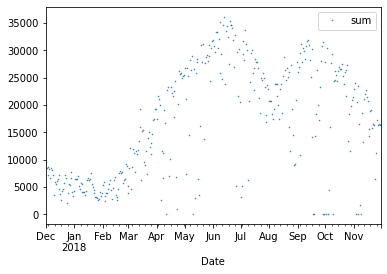

In [53]:
dfDay.plot(y="Rented Bike Count",linestyle="",marker=".",markersize=1)

We can see that during winter there are less bykes that are used.

<AxesSubplot:xlabel='Hour'>

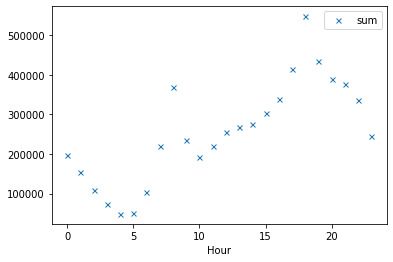

In [58]:
dfHour.plot(y="Rented Bike Count",linestyle="",marker="x",markersize=5)

<AxesSubplot:xlabel='month'>

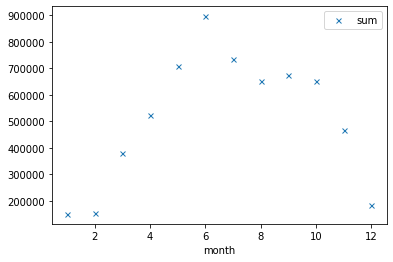

In [64]:
dfMonth.plot(y="Rented Bike Count",linestyle="",marker="x",markersize=5)

In [74]:
#Create target and data with sklearn
from sklearn import datasets

x = df.drop(['Rented Bike Count'], axis = 1)
y = df["Rented Bike Count"]
x.shape, y.shape

((8760, 17), (8760,))

In [75]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(x,y)
model1.score(x,y)

TypeError: The DTypes <class 'numpy.dtype[int64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [76]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
reg.score(x, y)

TypeError: The DTypes <class 'numpy.dtype[int64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [77]:
#Create train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

#Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

NameError: name 'X_train' is not defined